### Домашнее задание к модулю 10
#### В качестве домашнего задания вам предлагается создать нейронную сеть с помощью механизмов Keras, которая будет классифицировать товары из датасета fasion_mnist.
#### Вам предстоит предложить свою собственную архитектуру сети. Точность самой наивной, но адекватной нейросети составляет примерно 91%. 
#### Точность вашей модели должна быть не ниже этого показателя. Чтобы добиться таких значений вам понадобится поэкспериментировать с параметрами сети такими как: 
#### количество слоев, количество нейронов, функции активации, количество эпох, размер батча и т.д. Решение оформите в виде отдельного ноутбука.

In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print('train_data: ', train_data.shape)
print('train_labels: ', train_labels.shape)
print('test_data: ', test_data.shape)
print('test_labels: ', test_labels.shape)

train_data:  (60000, 28, 28)
train_labels:  (60000,)
test_data:  (10000, 28, 28)
test_labels:  (10000,)


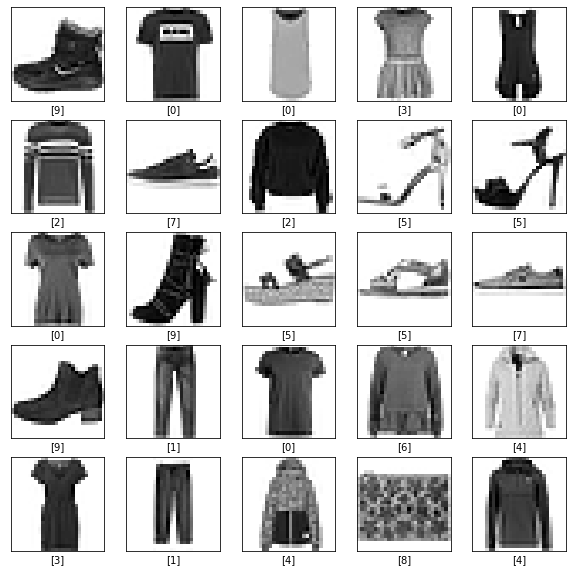

In [5]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_data[i], cmap=plt.cm.binary)
    plt.xlabel([train_labels[i]])
plt.show()

In [ ]:
# def vectorize_sequences(sequences, dimension=10000):
#   results = np.zeros((len(sequences), dimension))
#   for i, sequence in enumerate (sequences):
#     results[i, sequence] = 1.0
#     return results

# x_train = vectorize_sequences(train_data)
# y_train = np.asarray(train_labels).astype('float32')

# x_test = vectorize_sequences(test_data)
# y_test = np.asarray(test_labels).astype('float32')

In [ ]:
# print('x_train: ', x_train.shape)
# print('y_train: ', y_train.shape)
# print('x_test: ', x_test.shape)
# print('y_test: ', y_test.shape)

In [16]:
from keras.metrics.metrics import accuracy
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras import optimizers
from keras import losses

model = Sequential([
    Flatten(input_shape=(28,28), name="layer1"),
    Dense(128, activation='relu', name="layer2"),
    # Dropout(0.5, name="layer"),
    Dense(128, activation='relu', name="layer3"),
    Dense(128, activation='relu', name="layer4"),
    Dense(128, activation='relu', name="layer5"),
    Dense(128, activation='relu', name="layer6"),
    Dense(10, activation='softmax', name="layer7"),
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [22]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Flatten)            (None, 784)               0         
                                                                 
 layer2 (Dense)              (None, 128)               100480    
                                                                 
 layer3 (Dense)              (None, 128)               16512     
                                                                 
 layer4 (Dense)              (None, 128)               16512     
                                                                 
 layer5 (Dense)              (None, 128)               16512     
                                                                 
 layer6 (Dense)              (None, 128)               16512     
                                                                 
 layer7 (Dense)              (None, 10)               

In [17]:
history = model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=256,
    validation_split=0.2,
    verbose=2
)

Epoch 1/20
188/188 - 3s - loss: 1.8317 - accuracy: 0.7226 - val_loss: 0.6653 - val_accuracy: 0.7646 - 3s/epoch - 17ms/step
Epoch 2/20
188/188 - 1s - loss: 0.5188 - accuracy: 0.8208 - val_loss: 0.5182 - val_accuracy: 0.8261 - 946ms/epoch - 5ms/step
Epoch 3/20
188/188 - 1s - loss: 0.4448 - accuracy: 0.8413 - val_loss: 0.4738 - val_accuracy: 0.8337 - 797ms/epoch - 4ms/step
Epoch 4/20
188/188 - 1s - loss: 0.4027 - accuracy: 0.8550 - val_loss: 0.4509 - val_accuracy: 0.8422 - 767ms/epoch - 4ms/step
Epoch 5/20
188/188 - 1s - loss: 0.3708 - accuracy: 0.8654 - val_loss: 0.4240 - val_accuracy: 0.8588 - 740ms/epoch - 4ms/step
Epoch 6/20
188/188 - 1s - loss: 0.3500 - accuracy: 0.8715 - val_loss: 0.4163 - val_accuracy: 0.8550 - 734ms/epoch - 4ms/step
Epoch 7/20
188/188 - 1s - loss: 0.3369 - accuracy: 0.8776 - val_loss: 0.4146 - val_accuracy: 0.8608 - 746ms/epoch - 4ms/step
Epoch 8/20
188/188 - 1s - loss: 0.3165 - accuracy: 0.8825 - val_loss: 0.3875 - val_accuracy: 0.8647 - 731ms/epoch - 4ms/step
Ep

In [32]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


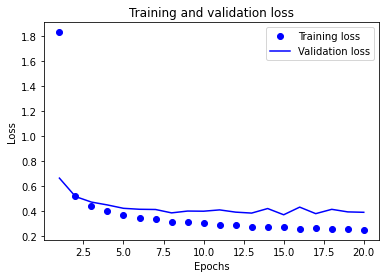

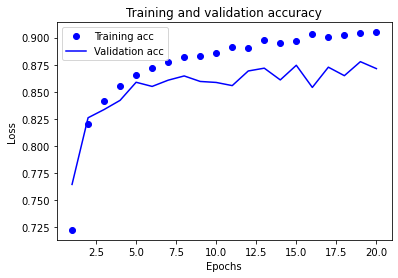

In [18]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy'])+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [19]:
results = model.evaluate(test_data, test_labels)
print(results)

313/313 [==============================] - 1s 2ms/step - loss: 0.4319 - accuracy: 0.8615
[0.4319221079349518, 0.8615000247955322]


In [23]:
result = model.predict(test_data)
print(result)

313/313 [==============================] - 1s 2ms/step
[[3.8800330e-10 2.4180216e-07 6.8921565e-08 ... 2.0655964e-03
  6.3706186e-11 9.9771994e-01]
 [2.6681371e-06 8.8722713e-10 9.9851745e-01 ... 2.1550605e-11
  1.0606412e-09 2.5271868e-12]
 [4.3616448e-18 1.0000000e+00 5.8526264e-17 ... 2.0221122e-17
  9.8391195e-21 4.9060538e-14]
 ...
 [1.9866725e-10 7.9373473e-11 8.3486872e-12 ... 3.0371880e-10
  1.0000000e+00 9.9947767e-12]
 [7.7010170e-13 1.0000000e+00 1.5360410e-12 ... 6.3220661e-18
  1.4957980e-16 1.5206988e-12]
 [2.5288105e-07 3.1412691e-07 9.4627488e-08 ... 4.0548405e-04
  1.1967250e-05 1.6405902e-06]]


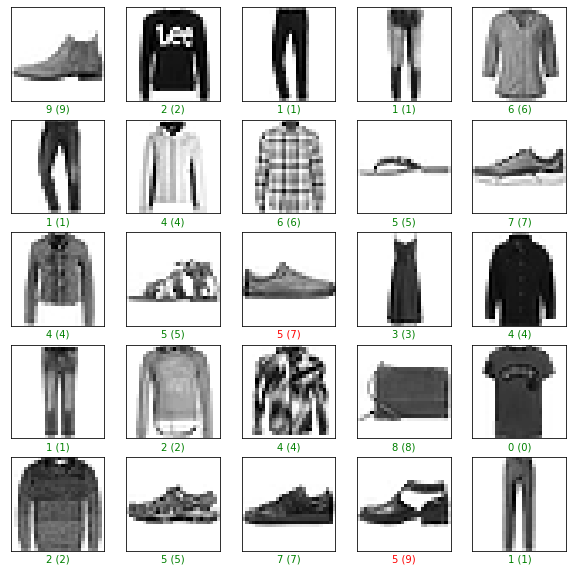

In [21]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    pred_y = np.argmax(result[i])
    true_y = test_labels[i]

    if pred_y == true_y:
      color ="green"
    else:
      color ="red"
    plt.imshow(test_data[i], cmap=plt.cm.binary)
    plt.xlabel("{} ({})".format(pred_y, true_y), color=color)
plt.show()

In [24]:
model.save("fashion_model")